# <center>Introduction to Data Science</center> 
### <center>K-Nearest Neighbors (K-NN) Project 2</center>
### <center>Water Quality</center>
### **<div align="right">By: Pujesh Pradhan </div>**

### Table of Content
* [Objective and Data Description](#Objective-and-Data-Description)
* [Statistical Numerical and Graphical Summaries](#Statistical-Numerical-and-Graphical-Summaries)
* [Algorithm Implementation and Statistical Tests](#Algorithm-Implementation-and-Statistical-Tests)
* [Performance Improvement](#Performance-Improvement)
* [Conclusion](#Conclusion)

### Objective and Data Description

#### Overview
Water is an essential part of any human being. Not all water accessible to humans are consumable. There are many factors that determine whether the water is safe for consumption. Many factors like the pH value and amount of different chemicals/minerals present in the water determines the potability of the water. Different region has different quality of water, and finding a right one can help yeild an economic benefit as well as health benefits. 

#### Objective
**Predicting whether the water quality is good for consumption based on different metrics of the water.**

#### About the Dataset
This dataset is being used from the Kaggle website and the URL to the dataset is: [Water Quality](https://www.kaggle.com/adityakadiwal/water-potability)

It has 10 fields and the description of each field of the dataset are: 
1. **pH value:** Evaluates the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO recommends a permissible limit of pH from 6.5 to 8.5. 

2. **Hardness:** Hardness defines the capacity of water to precipitate soap caused by Calcium and Magnesium. It is mainly caused by calcium and magnesium salts which are dissolved from geologic deposits. 

3. **Solids (Total dissolved solids - TDS):** It indicates the ability to dissolve a wide range of inorganic and some organic minerals or salts. These minerals produce unwanted taste and diluted color in appearance of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is between 500 mg/l and 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines:** Determines the amount of Chlorine and chloramine which are used as disinfectants in public water systems. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe for drinking water.

5. **Sulfate:** Indicates the amount of Sulfates in the water. They are naturally occurring substances that are found in minerals, soil, and rocks. 

6. **Conductivity:** Indicates the ionic conductivity of the water. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. Pure water is not a good conductor of electric current rather it is a good insulator. The amount of dissolved solids in water determines the electrical conductivity. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:** Total Organic Carbon (TOC) measures the total amount of carbon in organic compounds in pure water. It comes from decaying natural organic matter (NOM) as well as synthetic sources. 

8. **Trihalomethanes:** Trihalomethanes (THMs) are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:** It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU. It depends on the quantity of solid matter present in the suspended state. 

10. **Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [2]:
#All the necessary packages are imported here.
import numpy as np

import pandas as pd 
from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

from math import sqrt

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Describing the size, shape and dimension of the dataset.
water_metrics = pd.read_csv('water_potability.csv') 
print("The total size of the dataset is {} bytes.".format(water_metrics.size))
print("There are {} number of records and {} number of fields with a {} shape.".format(water_metrics.shape[0], water_metrics.shape[1], water_metrics.shape))
print("The dataset has a {} dimension structure.".format(water_metrics.ndim))

The total size of the dataset is 32760 bytes.
There are 3276 number of records and 10 number of fields with a (3276, 10) shape.
The dataset has a 2 dimension structure.


In [4]:
print("The top 5 records of the dataset are: \n{}".format(water_metrics.head()))

The top 5 records of the dataset are: 
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


Here certain fields have missing values that are filled by NaN values.

In [1]:
print("The datatype of the dataset are: \n{}".format(water_metrics.dtypes))

NameError: name 'water_metrics' is not defined

In [6]:
print(water_metrics.describe().T)

                  count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  

From the above statistics, we can see that there are certain values missing for ph, sulphate and trihalomethanes. 
The metrics min-max ranges widely from each other, thus scalability/normalization of the data is required. 
Few of the metrics looks to display skewness in the data. 

We will be removing all instances that has NaN values in it. 

In [7]:
#Deleting all the rows with NaN values
water_metrics = water_metrics.dropna()

In [8]:
print("Now, the number of rows has been reduced to {} rows and the new shape is {}".format(water_metrics.shape[0], water_metrics.shape))

print("The new data looks likes this: \n{}".format(water_metrics.describe().T))

Now, the number of rows has been reduced to 2011 rows and the new shape is (2011, 10)
The new data looks likes this: 
                  count          mean          std         min           25%  \
ph               2011.0      7.085990     1.573337    0.227499      6.089723   
Hardness         2011.0    195.968072    32.635085   73.492234    176.744938   
Solids           2011.0  21917.441374  8642.239815  320.942611  15615.665390   
Chloramines      2011.0      7.134338     1.584820    1.390871      6.138895   
Sulfate          2011.0    333.224672    41.205172  129.000000    307.632511   
Conductivity     2011.0    426.526409    80.712572  201.619737    366.680307   
Organic_carbon   2011.0     14.357709     3.324959    2.200000     12.124105   
Trihalomethanes  2011.0     66.400859    16.077109    8.577013     55.952664   
Turbidity        2011.0      3.969729     0.780346    1.450000      3.442915   
Potability       2011.0      0.403282     0.490678    0.000000      0.000000   

 

### Statistical Numerical and Graphical Summaries

The scatter matrix can be constructed to display how the data are distributed across the dataset.



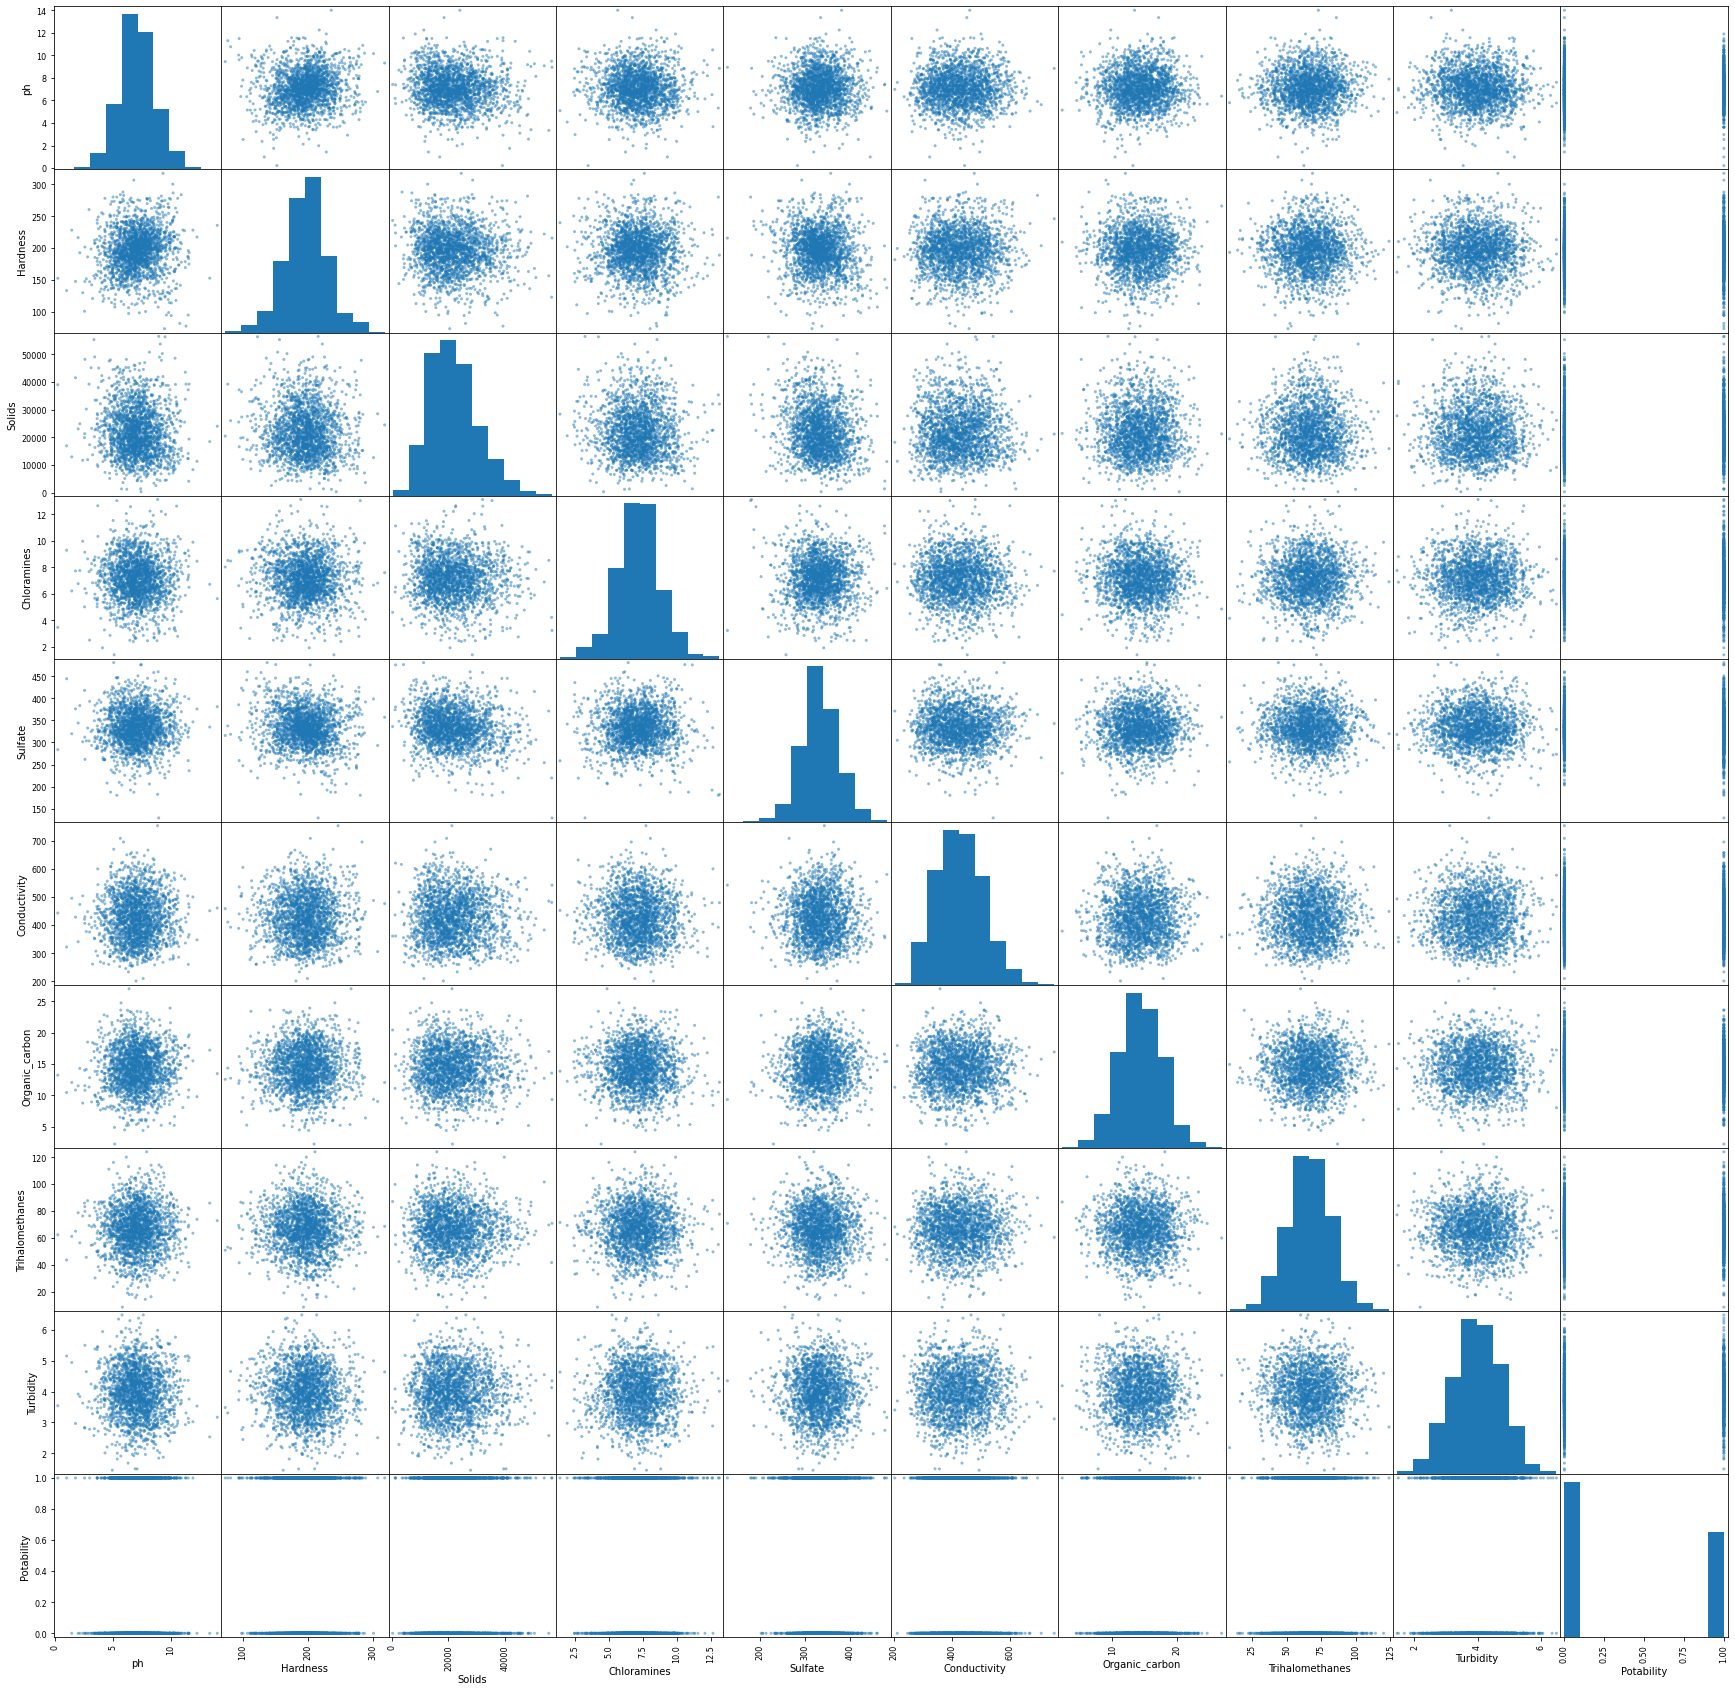

In [8]:
print("The scatter matrix can be constructed to display how the data are distributed across the dataset.\n")

_scatter_matrix_data = scatter_matrix(water_metrics, figsize=(30,30), diagonal='hist')

From the above graph while considering the histograms on the diagonals we find that most of the fields are normally distributed with some displaying outliers. 

Below is the list of all the keys of the dataset and also determines whether they are normally distributed or skewed.

In [9]:
for data_keys in water_metrics.keys():
      skewness = water_metrics[data_keys].skew()
      if skewness > 0: 
          print(data_keys, "is Right Skewed")
      elif skewness <0:
          print(data_keys, "is Left Skewed")
      else:
          print(data_keys, "is Normally Distributed")

ph is Right Skewed
Hardness is Left Skewed
Solids is Right Skewed
Chloramines is Right Skewed
Sulfate is Left Skewed
Conductivity is Right Skewed
Organic_carbon is Left Skewed
Trihalomethanes is Left Skewed
Turbidity is Left Skewed
Potability is Right Skewed


We can further create a pairplot graph to determine if the water is Potable or Not Potable


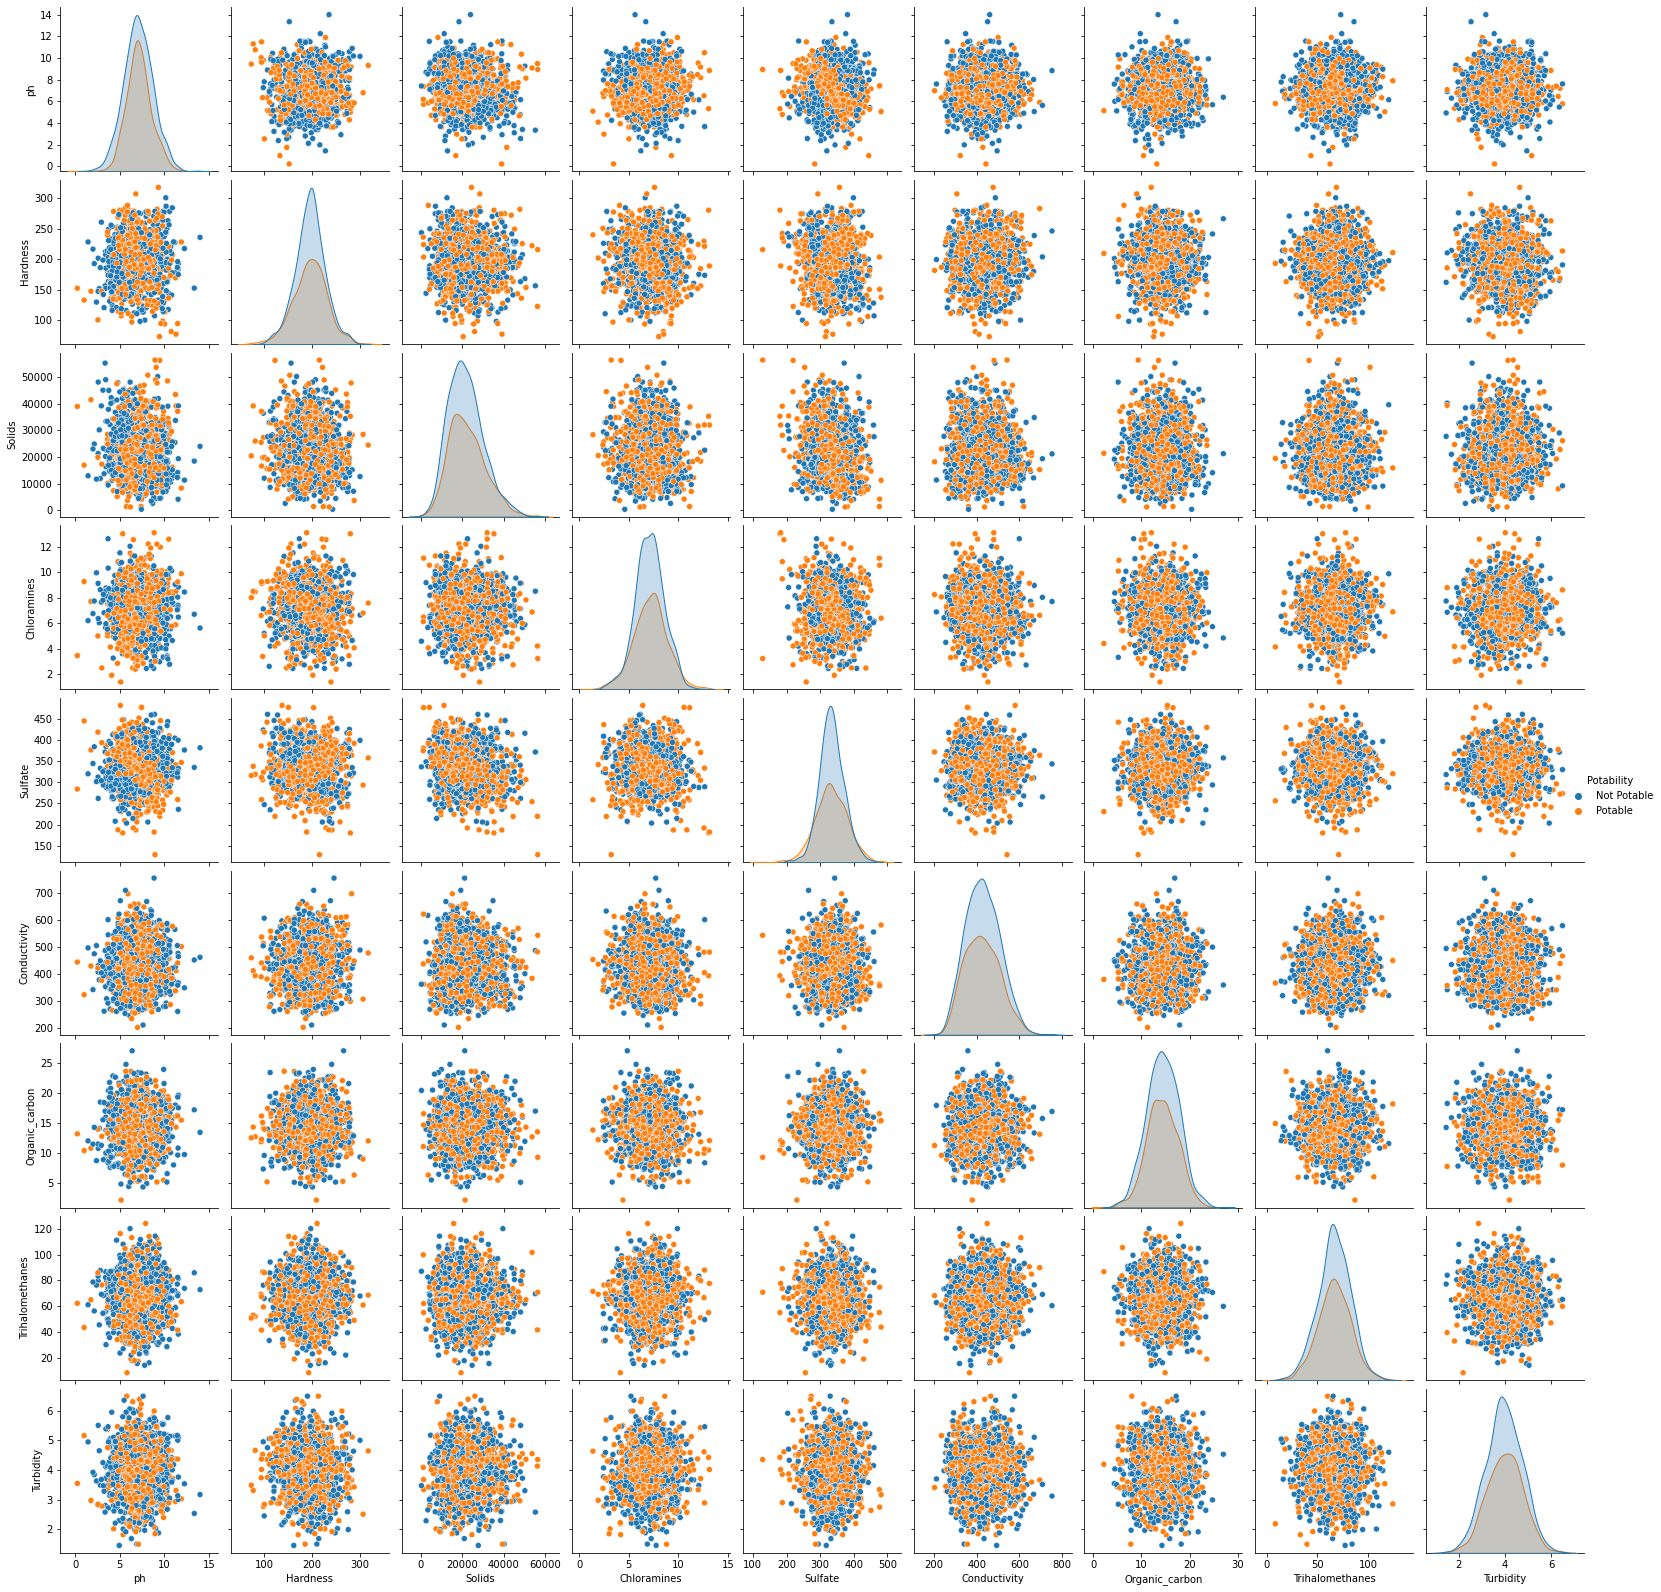

In [10]:
#plotting pairplot to see how the data are scattered based on the target variable
print("We can further create a pairplot graph to determine if the water is Potable or Not Potable")

_sns_pairplot_data = sns.pairplot(water_metrics, hue='Potability')

#Updating the legend label for ease. Replacing 0 as Not Potable and 1 as Potable.
new_labels = ['Not Potable', 'Potable']
for t, l in zip(_sns_pairplot_data._legend.texts, new_labels): 
    t.set_text(l)

In the graph above, the blue dots/area denotes the water quality as "Not Potable" where as orange marks the quality as "Potable". 
We can see there are outliers present in the graphs. <br/>
Looking at the graph, we can identify hardness, solids, chloramines, sulfate, conductivity and turbidity metrics might be sufficed to determine the quality of the water. <br/>
However, it is quite difficult to say which metrics factors more as we can see that both the type of water are dispersed evenly in the scatter plot. 
We can also see that the data is underfitting as orange dots (Potable) outcomes can be seen dominating the blue dots (Not Potable).

We can determine the important features using the Random Forest Regression ensembles from whose result we can pick the important features for our algorithm. 

The feature importance scores obtained are: 
ph                 0.162801
Sulfate            0.155958
Chloramines        0.135041
Hardness           0.123643
Solids             0.118465
Conductivity       0.103467
Trihalomethanes    0.101564
Organic_carbon     0.099060
dtype: float64



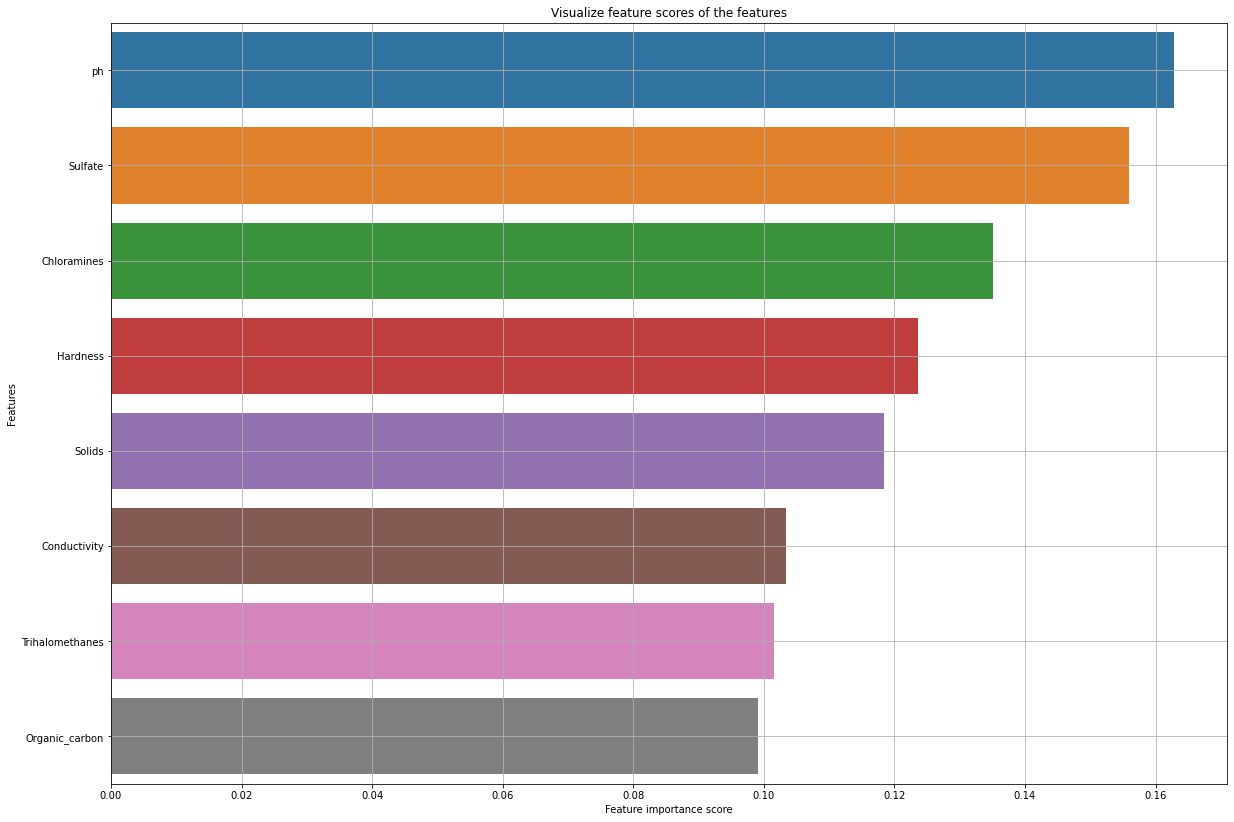

In [11]:
#Finding the important features that contribute to indicate the potability.
pred_variables = water_metrics.iloc[:, 0:8]
targ_variables = water_metrics['Potability']

X_train, X_test, y_train, y_test = train_test_split(pred_variables, targ_variables, test_size=0.25, random_state=1)

#Using 100 trees for the Random Forest Regressor. 
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

#Sorting the indexes of the list based on the values of the random forest regressor
sorted_idx = rf.feature_importances_.argsort()

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("The feature importance scores obtained are: \n{}\n".format(feature_scores))

f, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=water_metrics.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
ax.grid()
plt.show()


From the above Feature importance score, we can see that the top 5 features that has major influences are :
1. Sulfate
2. ph
3. Chloramines
4. Hardness 
5. Solids 

The least 3 important feature are the Conductivity, Oragnic_carbon and Trihalomethanes field. 

We will consider the above 5 features and calculate the prediction accuracy using the K-NN algorithm. 

### Algorithm Implementation and Statistical Tests 

Implementing the K-NN (K-Nearest Neighbour) algorithm to predict the classification of the water quality as Potable or Not Potable. <br/>

In [12]:
#Selecting the predictor variables and target variable as obtained from the above feature importance.
predictor_variables = water_metrics[['Sulfate', 'ph', 'Chloramines', 'Hardness', 'Solids']]
target_variable = water_metrics[['Potability']]

#Splitting the data into training/test sets. 
#The X_ stores the data of predictor variables and y_ stores the data for target variable. 
#Since, the dataset has 2011 rows, splitting data to 75% training and 25% test set.
X_train, X_test, y_train, y_test = train_test_split(
    predictor_variables, target_variable, test_size=0.25, random_state=0)

#Validating the shape of the training and test sets.
print("The shape of the training set: {}{}".format(X_train.shape, y_train.shape))
print("The shape of the test set: {}{}".format(X_test.shape, y_test.shape))

#As we have seen above, the range for each field differs from the other 
#and since all of the fields were slightly skewed, we will use the Min Max Normalization method to scale our data.
scaler = MinMaxScaler()

#Computing the min and max for scaling and transforming each feature to the range between 0 and 1
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Picking the value of k using the square root of the total number of training instances and Initiailzing the knn algorithm.
value_k = int(sqrt(X_train.shape[0]))

classifier = KNeighborsClassifier(n_neighbors=value_k) 
#np.ravel is used to transform the multidimensional to a one-dimensional 
classifier.fit(X_train, np.ravel(y_train, order='C'))

prediction_score = classifier.score(X_test, y_test)
print("The prediction accuracy for the test data is: {} with value of k = {}"
      .format(round(prediction_score*100,2), value_k))

The shape of the training set: (1508, 5)(1508, 1)
The shape of the test set: (503, 5)(503, 1)
The prediction accuracy for the test data is: 71.57 with value of k = 38


In [13]:
#Selecting the all of the predictor variables and target variable to see how the accuracy varies. 
pred_variables = water_metrics.iloc[:, 0:8]
targ_variable = water_metrics[['Potability']]

#Splitting the data into training/test sets. 
#The X_ stores the data of predictor variables and y_ stores the data for target variable. 
#Since, the dataset has 2011 rows, splitting data to 75% training and 25% test set.
A_train, A_test, b_train, b_test = train_test_split(
    pred_variables, targ_variable, test_size=0.25, random_state=0)

#Validating the shape of the training and test sets.
print("The shape of the training set: {}{}".format(A_train.shape, b_train.shape))
print("The shape of the test set: {}{}".format(A_test.shape, b_test.shape))

#As we have seen above, the range for each field differs from the other 
#and since all of the fields were slightly skewed, we will use the Min Max Normalization method to scale our data.
scaler = MinMaxScaler()

#Computing the min and max for scaling and transforming each feature to the range between 0 and 1
scaler.fit(A_train)

A_train = scaler.transform(A_train)
A_test = scaler.transform(A_test)

#Picking the value of k using the square root of the total number of training instances and Initiailzing the knn algorithm.
value_n = int(sqrt(A_train.shape[0]))

knn = KNeighborsClassifier(n_neighbors=value_n) 
#np.ravel is used to transform the multidimensional to a one-dimensional 
knn.fit(A_train, np.ravel(b_train, order='C'))

pred_score = knn.score(A_test, b_test)
print("The prediction accuracy while using all the features for the test data is: {} with value of k = {}"
      .format(round(pred_score*100,2), value_n))

The shape of the training set: (1508, 8)(1508, 1)
The shape of the test set: (503, 8)(503, 1)
The prediction accuracy while using all the features for the test data is: 68.19 with value of k = 38


The prediction accuracy seems higher when only few columns are selected rather than using all the features for predictions. 

### Performance Improvement

In [14]:
#Creating the classification report for the test dataset. We need the prediction matrix to create the report.
predictions = classifier.predict(X_test)

print("The classification report is as follows: \n{}".format(classification_report(y_test, predictions)))

The classification report is as follows: 
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       309
           1       0.77      0.37      0.50       194

    accuracy                           0.72       503
   macro avg       0.74      0.65      0.65       503
weighted avg       0.73      0.72      0.69       503



The overall accuracy obtained is 72% on the test data with 28% error rate (1-prediction accuracy). The prediction of Potable is higher and the sensitivity for this is 77%. However, the sensitivity score for correctly identifying Not Potable data is lower with 70%. 

The higher rate of accuracy in obtaining accuracy for Potable is due to the bias or underfitting of the data.

In [15]:
#Creating the confusion matrix for the prediction
#As per the document, the count of true negatives is C[0,0], false negatives is C[1,0], true positives is C[1,1] and 
#false positives is C[0,1]
matrix_data = pd.DataFrame(confusion_matrix(y_test, predictions), index=['F', 'T'], columns=['F', 'T'])
print("The confusion matrix looks like this: \n{}\n".format(matrix_data))

print("The AUROC value is: {}".format(roc_auc_score(y_test, predictions)))

The confusion matrix looks like this: 
     F   T
F  288  21
T  122  72

The AUROC value is: 0.6515864277850065


We can see that there are lot of False negatives. This might be due to the underfitting of the data. Here majority of the data are predicted incorrectly. <br/>
The AUROC value is about 0.65 which identifies that the separability has not been achieved efficiently. 

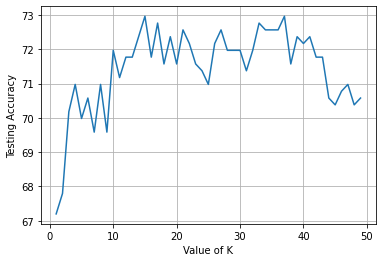

In [16]:
#Testing the rate of accuracy with different value for k. Taking the range from 1 to 50
#The values are stored in a list and a line graph will be plotted to visualize. 

from sklearn.metrics import accuracy_score
scores = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, np.ravel(y_train, order='C'))
    scores.append(knn.score(X_test, y_test)*100)
    
plt.plot(range(1,50), scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')
plt.grid()
plt.show()

With providing different values for k, we can see that the highest accuracy was found when value of k at different points like 15 and 35.

In [17]:
#Optimizing the k-nn algorithm using the k-fold Cross-validation with 10 folds. 
#This method will determine how well the knn algorithm works with the dataset. 
#We will be using the entire dataset for the cross-validation, thus we need to scale all the data. 

scaler = MinMaxScaler()
scaler.fit(predictor_variables) 

predictor_variables = scaler.transform(predictor_variables)

#Using the k value for knn same as previous. (k = 38)
knn = KNeighborsClassifier(n_neighbors=38)
cv_scores = cross_val_score(knn, predictor_variables, np.ravel(target_variable, order='C'), cv = 10)
print("The cross-validation scores are: \n{}\n".format(cv_scores))
print("The testing accuracy with the 10-fold cross-validation is: {}".format(np.mean(cv_scores)*100))

The cross-validation scores are: 
[0.66336634 0.5920398  0.70646766 0.70646766 0.72139303 0.60696517
 0.63681592 0.5920398  0.67661692 0.73134328]

The testing accuracy with the 10-fold cross-validation is: 66.33515590365006


We have got a testing accuracy of 66% and the features that are used were based on the feature importance from the Random Forest Regression. <br/>

In [18]:
#We are now running the k-fold cross-validation with 10 folds for a range of value of k. 
predictor_variables = water_metrics[['Sulfate', 'ph', 'Chloramines', 'Hardness', 'Solids']]
target_variables = water_metrics[['Potability']]

scaler = MinMaxScaler()
scaler.fit(predictor_variables)

predictor_variables = scaler.transform(predictor_variables)

scores = []
mean_scores = []
for k in range(1, 50):
    classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(classifier, predictor_variables, np.ravel(target_variables, order='C'), cv=10)
    scores.append(cv_scores)
    mean_scores.append(np.mean(cv_scores)*100)

k_mean_score = [(mean, k) for k, mean in enumerate(mean_scores)]
k_mean_score.sort(reverse=True)

#Printing the top 20 predictions accuracy 
print("The top 20 prediction accuracy are: \n")
for i in range(0,20):
    print("The prediction accuracy of {}% is found for k={}".format(round(k_mean_score[i][0],2), k_mean_score[i][1]+20))

The top 20 prediction accuracy are: 

The prediction accuracy of 67.18% is found for k=52
The prediction accuracy of 67.18% is found for k=50
The prediction accuracy of 67.03% is found for k=54
The prediction accuracy of 66.98% is found for k=49
The prediction accuracy of 66.88% is found for k=48
The prediction accuracy of 66.78% is found for k=53
The prediction accuracy of 66.73% is found for k=60
The prediction accuracy of 66.68% is found for k=59
The prediction accuracy of 66.63% is found for k=56
The prediction accuracy of 66.63% is found for k=37
The prediction accuracy of 66.58% is found for k=44
The prediction accuracy of 66.58% is found for k=45
The prediction accuracy of 66.53% is found for k=46
The prediction accuracy of 66.53% is found for k=43
The prediction accuracy of 66.43% is found for k=55
The prediction accuracy of 66.43% is found for k=51
The prediction accuracy of 66.43% is found for k=47
The prediction accuracy of 66.43% is found for k=58
The prediction accuracy of

Here based on the 10-fold cross-validation for k with range from 1 to 50, we can see majority of them has a prediction accuracy of 67% which is slightly lower than our first attempt. <br/>
Also, accuracy of 66% is obtained for k = 38 which is the k value that was obtained by computing the square root of the total number of training data sample. <br/>
Thus, we can confirm that the value of k taken as 38 before is efficient for this dataset. 

Max train score 100.0 % and k = [1]
Max test score 57.057654075546715 % and k = [4]


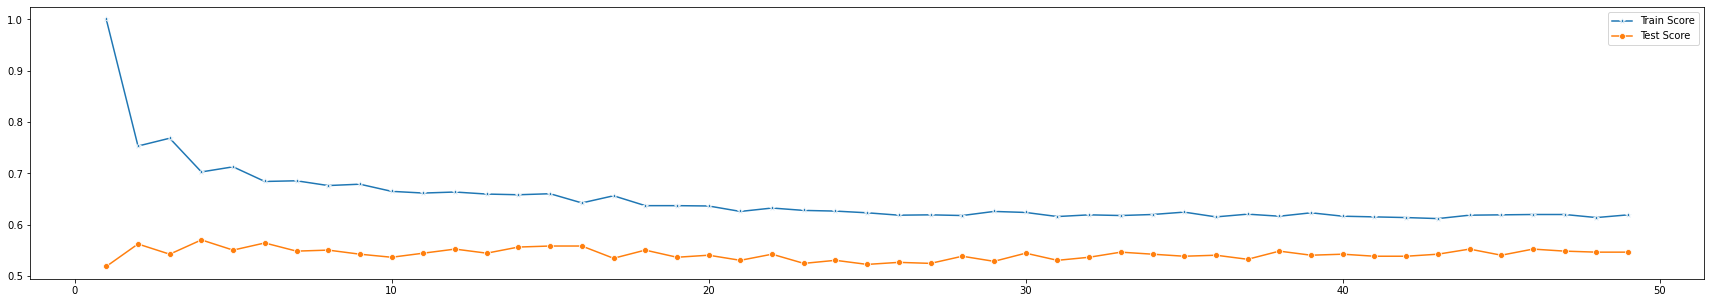

In [19]:
#Plotting the graph for different training scores and test scores 
test_scores = []
train_scores = []

predictor_variables = water_metrics[['Sulfate', 'ph', 'Chloramines', 'Hardness', 'Solids']]
target_variables = water_metrics[['Potability']]

X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target_variables, test_size=0.25, random_state=4)

for k in range(1,50):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## Training Evaluation
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## Testing Evaluation
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Train Test Evaluation
plt.figure(figsize=(30,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')

In the above evaluation of the training and testing data set, we can see the max train score is 100% at k = 1 which is not practical. When the value of k is lower we can see the data is underfitting due to bias. Similarly the graph displays that the prediction accuracy are low for lower value of k. This represents the overfitting of data due to variances obtained in the dataset. <br/>
As the value of k increases the training and testing accuracy does not aligns. The highest accuracy value of test score is 57% for k = 4. <br/>
From the above train-test evaluation graph, it looks like the dataset has noises and bias and variance factors alot. 

### Conclusion

From the findings obtained using the k-nn algorithm, we were able to obtain an approx. prediction accuracy of 72%. Also, we have seen that the prediction accuracy was improved when only certain featuers were considered rather than the whole predictor variables. Among 10 features listed, 5 of the features put up more weightage in determining whether the water is potable or not potable. 

As we know, presence of different chemicals/minerals certainly affects the quality of the water, and thus these values might be required to indicate the potability of the water. 

Also, from the confusion matrix, we can see that high number of true negatives and false positives are predicted. This shows that the dataset is not efficient in predicting the outcomes as 28% of the overall test data were predicted inaccurately. 

Using the algorithm we would like to predict the quality of the water using the data in different regions in order to extract water and supply them, which in return boost the economy as well as humans can consume healthier water. 